## Boston Dataset -- To predict the House prices in Boston Province 

## Steps involved in the whole process after problem statement given
1. Read Data
2. Variable Identification-- Target is the dependent variable, independent variables used for model building
3. Univariate Analysis-- Tabular method-describe() for continous ; value_counts for categorical,Graphical-histogram/Boxplot/
4. Bivariate Analysis-- For continous -continous variables-- scatter plot,corr() 
5. Missing value--Impute
6. Outlier --capping or Binning 
7. Variable Transformation-- log/standard scalar/
8. Model Building-- Regression

### Step 1: Loading Data from sklearn. We see that 13 independent variables are saved in the dataframe. Target(Price) is saved in a separate variable.There are 506 records in the dataset. To get description about the dataset we give boston.DESCR. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

C:\Users\Belle\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the dataset
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step 2: Independent features saved as numpy array by name boston.data and target in boston.target. Independent Feature names are in boston.feature_names

In [3]:
## data divided in boston.data and boston.target
print(type(boston.data),'Independent Features',boston.data.shape,'\nTarget',boston.target.shape,type(boston.target))
# to get boston feature names
print(boston.feature_names)

<class 'numpy.ndarray'> Independent Features (506, 13) 
Target (506,) <class 'numpy.ndarray'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Creating a Dataframe with features and target variable. 

In [4]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['Price']=boston.target
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

### Step 3: Univariate analysis - .describe(), plotting histogram/boxplot taking some features

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


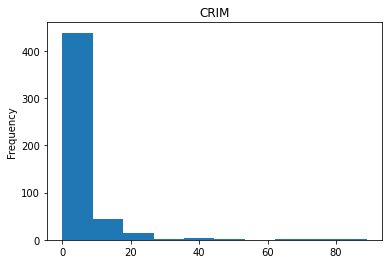

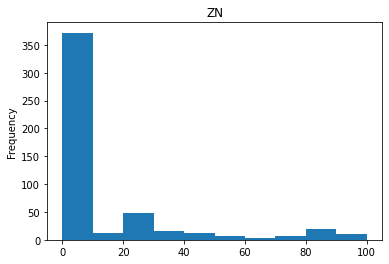

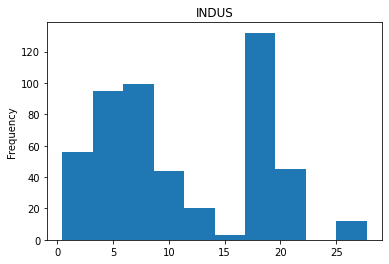

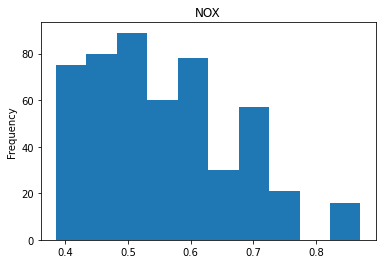

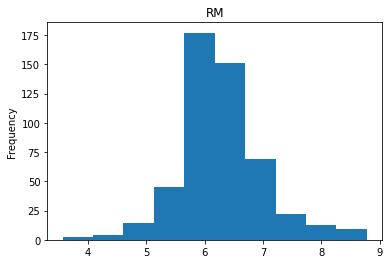

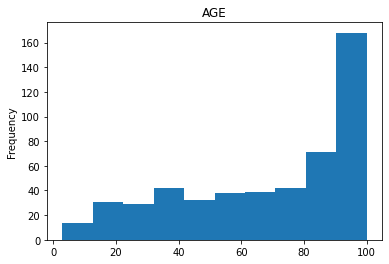

In [6]:
col=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE']
for i in col:
    df[i].plot.hist()
    plt.title(i)
    plt.show()

In [7]:
S1=['INDUS','RM','DIS','RAD','PTRATIO']
S2=['CRIM','ZN','AGE']
S3=['TAX','B','LSTAT']

<AxesSubplot:>

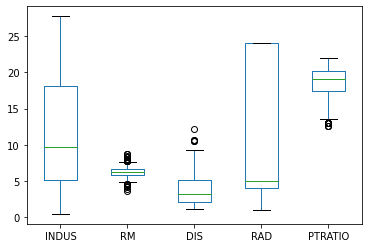

In [8]:
df[S1].plot.box()

<AxesSubplot:>

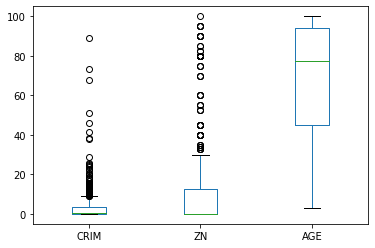

In [9]:
df[S2].plot.box()

<AxesSubplot:>

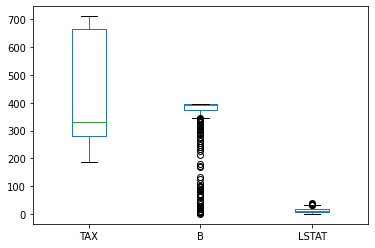

In [10]:
df[S3].plot.box()

### Step 4: Bivariate Analysis

<AxesSubplot:>

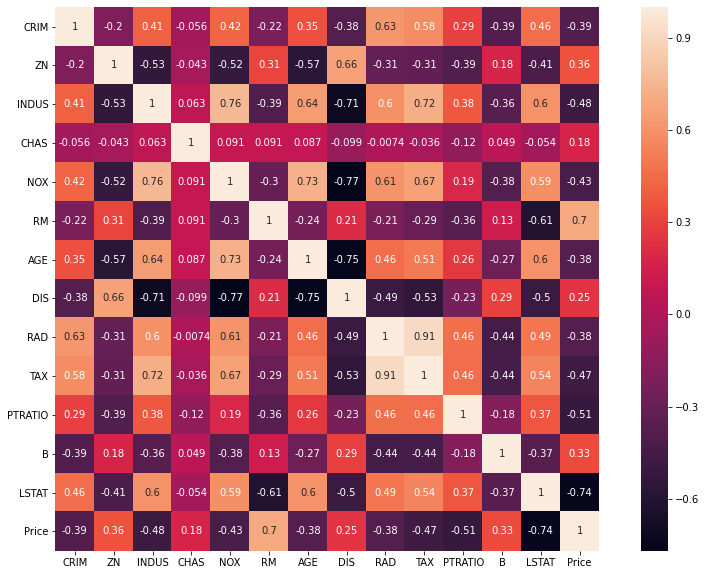

In [11]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,square=True)

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

### Step 5: Missing value -- No Missing Values

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Step 6: Outliers
1. When we try to analyse the outliers for this dataset,
2. we can ignore outlier in CHAS as it is just 0 or 1 value. 
3. Then for RM(No of Rooms ) there may be houses with more than 7 or 8 rooms. 
4. Will try to cap the CRIM,ZN and B values to its 99th percentile or 0.1 th percentile



In [14]:
## Count the outliers in the dataset
def outcount(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outcount(df)

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
Price      40
dtype: int64

### Step 7 : Feature Selection/Feature Engineering

<AxesSubplot:>

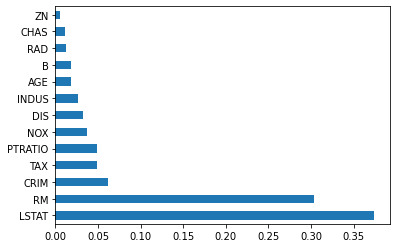

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(df.drop(['Price'],axis=1),df['Price'])
fea=pd.Series(model.feature_importances_,index=df.drop(['Price'],axis=1).columns)
#fea.nlargest(5).plot(kind='barh') getting top 5 
fea.sort_values(ascending=False).plot(kind='barh')

In [15]:
# Binning
import copy
df1=copy.deepcopy(df)
bins=[0.2,0.5,1]
group=['g1','g2']
df1['Nox_Group']=pd.cut(df1['NOX'],bins,labels=group,include_lowest=True)

In [16]:
df1.groupby('Nox_Group')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Nox_Group,,,,,,,,
g1,192.0,26.618229,7.371036,14.4,21.675,24.35,30.875,50.0
g2,314.0,20.034713,9.317737,5.0,14.100,18.90,22.775,50.0


In [17]:
# Binning
bins=[0,50,1000]
group=['b1','b2']
df1['B_Group']=pd.cut(df1['B'],bins,labels=group,include_lowest=True)

In [18]:
df1.groupby('B_Group')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
B_Group,,,,,,,,
b1,20.0,12.005000,3.526811,7.2,8.775,11.75,13.850,19.0
b2,486.0,22.966049,9.101042,5.0,17.525,21.55,25.275,50.0


In [26]:
#standardisation
#standard scalar-- standarisation
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
cnames=['TAX','B']
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
for col in cnames:
    
    df[col]=sc.fit_transform(df[col].values.reshape(-1,1))
    


In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,506.000000
mean,6.438166,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,-9.934960e-16,18.455534,-1.451408e-16,12.653063,22.532806
std,13.687146,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,1.000990e+00,2.164946,1.000990e+00,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,-1.313990e+00,12.600000,-3.907193e+00,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,-7.675760e-01,17.400000,2.050715e-01,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,-4.646726e-01,19.050000,3.811865e-01,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,1.530926e+00,20.200000,4.336510e-01,16.955000,25.000000
max,41.370330,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.798194e+00,22.000000,4.410519e-01,37.970000,50.000000


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
x=df.drop(['Price'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
rf_random.fit(x_train,y_train)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2=r2_score(y_test,predictions)
print(R2)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [41]:
rf_random.best_params_,rf_random.best_score_

({'n_estimators': 700,
  'min_samples_split': 15,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 20},
 -11.86138880905872)

In [45]:
rf_random.best_params_,rf_random.best_score_
predictions=rf_random.predict(x_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2=r2_score(y_test,predictions)
print(R2)

MAE: 2.426688873100527
MSE: 9.33299535345276
RMSE: 3.0549951478607555
0.9055626643188593


In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
learning_rate=[0.01,0.05,0.1,0.5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate':learning_rate}
xgb=xg.XGBRegressor()
xg_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xg_random.fit(x_train,y_train)
print(xg_random.best_params_,xg_random.best_score_)
predictions=xg_random.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2=r2_score(y_test,predictions)
print(R2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05 
[23:02:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05, total=   2.1s
[CV] n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05 
[23:02:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05, total=   1.7s
[CV] n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05 
[23:02:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05, total=   1.9s
[CV] n_estimators=700, max_features=sqrt, max_depth=20, learning_rate=0.05 
[23:02:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

[CV]  n_estimators=700, max_features=sqrt, max_depth=15, learning_rate=0.5, total=   0.7s
[CV] n_estimators=700, max_features=sqrt, max_depth=15, learning_rate=0.5 
[23:03:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=700, max_features=sqrt, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] n_estimators=700, max_features=sqrt, max_depth=15, learning_rate=0.5 
[23:03:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  n_estimators=800, max_features=sqrt, max_depth=25, learning_rate=0.05, total=   1.9s
[CV] n_estimators=800, max_features=sqrt, max_depth=25, learning_rate=0.05 
[23:03:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=800, max_features=sqrt, max_depth=25, learning_rate=0.05, total=   1.8s
[CV] n_estimators=800, max_features=sqrt, max_depth=25, learning_rate=0.05 
[23:03:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

[CV]  n_estimators=900, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   1.6s
[CV] n_estimators=900, max_features=sqrt, max_depth=20, learning_rate=0.1 
[23:04:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=900, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   1.6s
[CV] n_estimators=900, max_features=sqrt, max_depth=20, learning_rate=0.1 
[23:04:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1

In [48]:
print(xg_random.best_params_,xg_random.best_score_)
predictions=xg_random.predict(x_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2=r2_score(y_test,predictions)
print(R2)

{'n_estimators': 1100, 'max_features': 'sqrt', 'max_depth': 25, 'learning_rate': 0.01} -13.232821618133826
MAE: 2.126267720203774
MSE: 8.208991447897963
RMSE: 2.86513375741831
0.9169360691171937


In [ ]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

### Step 8: Model Building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

x=df.drop(['Price'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

reg=LinearRegression()          
reg=reg.fit(x_train,y_train)
pred=reg.predict(x_test)
mse=mean_squared_error(y_test,pred)
R2=r2_score(y_test,pred)
rmse=np.sqrt(mse)
print('Linear Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.linear_model import Lasso,Ridge
Las=Lasso(alpha=0.1)
Las=Las.fit(x_train,y_train)
pred_las=Las.predict(x_test)
mse=mean_squared_error(y_test,pred_las)
R2=r2_score(y_test,pred_las)
rmse=np.sqrt(mse)
print('Lasso Regression',"R2:",R2,"\nrmse:",rmse)


from sklearn.linear_model import Lasso,Ridge
rid=Ridge(alpha=0.01)
rid=rid.fit(x_train,y_train)
pred_rid=rid.predict(x_test)
mse=mean_squared_error(y_test,pred_rid)
R2=r2_score(y_test,pred_rid)
rmse=np.sqrt(mse)

print('Ridge Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
mse=mean_squared_error(y_test,pred_knn)
R2=r2_score(y_test,pred_knn)
rmse=np.sqrt(mse)

print('KNeighborsRegressor',"R2:",R2,"\nrmse:",rmse)


import xgboost as xg 
xgb_r = xg.XGBRegressor(n_estimators = 20) 
xgb_r=xgb_r.fit(x_train,y_train)
pred_xgb_r=xgb_r.predict(x_test)
mse=mean_squared_error(y_test,pred_xgb_r)
R2=r2_score(y_test,pred_xgb_r)
rmse=np.sqrt(mse)

print('XGBRegressor',"R2:",R2,"\nrmse:",rmse)
  

Linear Regression R2: 0.7683217630966319 
rmse: 4.784992721953757
Lasso Regression R2: 0.7481633852498772 
rmse: 4.988823028290959
Ridge Regression R2: 0.7683978068709841 
rmse: 4.784207368148467
KNeighborsRegressor R2: 0.47323251120028365 
rmse: 7.215196170127356
XGBRegressor R2: 0.9182741266393601 
rmse: 2.8419631799211356


In [ ]:
import numpy as np
np.random.seed(123)

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import csr_matrix, hstack

%%time

lr = LinearRegression()
lr_params = {}
lr_grid = GridSearchCV(lr, lr_params, cv=5, verbose=5, scoring='neg_mean_absolute_error')
lr_grid.fit(train, y)
lr_score = lr_grid.cv_results_
print (lr_score)

In [50]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,square=True)